In [ ]:
import pandas as pd
import sqlite3

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [52]:
yelp = pd.read_csv('yelp.csv',index_col = 0)
fs = pd.read_csv('fs_Data.csv',index_col = 0)

In [53]:
df = pd.concat([yelp,fs])

In [54]:
bikes = pd.read_csv('data_city_bikes.csv', index_col = 0)
bikes

,name,latitude,longitude,num_bikes
0,GEORGES LANE,53.350230,-6.279696,2
1,NORTH CIRCULAR ROAD (O'CONNELL'S),53.357841,-6.251557,8
2,PHIBSBOROUGH ROAD,53.356307,-6.273717,6
3,SMITHFIELD NORTH,53.349562,-6.278198,12
4,CLONMEL STREET,53.336021,-6.262980,14
...,...,...,...,...
109,JAMES STREET EAST,53.336597,-6.248109,11
110,PARNELL SQUARE NORTH,53.353742,-6.265301,2
111,FOWNES STREET UPPER,53.344603,-6.263371,10
112,SMITHFIELD,53.347692,-6.278214,26


In [55]:
df_m = pd.merge(bikes,df,left_on ='name',right_on = 'station_name', how = 'left' ) 

df_m

,name_x,latitude,longitude,num_bikes,station_name,name_y,rating,Address,rating_counts,distance
0,GEORGES LANE,53.350230,-6.279696,2,GEORGES LANE,Urbanity,4.5,The Glass House 11 Coke Lane Smithfield Dublin...,49.0,381.330910
1,GEORGES LANE,53.350230,-6.279696,2,GEORGES LANE,Queen of Tarts,4.5,Cork Hill Dame Street Dublin 2 Republic of Ire...,516.0,1055.350508
2,GEORGES LANE,53.350230,-6.279696,2,GEORGES LANE,Wuff,4.5,"23 Benburb Street Smithfield, 7 Republic of Ir...",115.0,358.126938
3,GEORGES LANE,53.350230,-6.279696,2,GEORGES LANE,Bittersweet Cafe,4.5,"Unit 3 Lord Edward Street Castlegate, 2 Republ...",21.0,1013.696469
4,GEORGES LANE,53.350230,-6.279696,2,GEORGES LANE,San Lorenzo's,4.5,"Unit 9, Castle House S Great Georges Street Du...",151.0,1251.465018
...,...,...,...,...,...,...,...,...,...,...
1753,FRANCIS STREET,53.342081,-6.275233,7,FRANCIS STREET,Groundstate Coffee,8.3,"48- 50 James’s Street, Dublin, D08 YK6N, Dublin",18.0,894.000000
1754,FRANCIS STREET,53.342081,-6.275233,7,FRANCIS STREET,The Coffee Bean,8.1,"64 Mary St, Dublin, Dublin City",14.0,844.000000
1755,FRANCIS STREET,53.342081,-6.275233,7,FRANCIS STREET,Proper Order Coffee Co.,8.1,"7 Haymarket, Smithfield, Dublin, Dublin City",82.0,671.000000
1756,FRANCIS STREET,53.342081,-6.275233,7,FRANCIS STREET,Craft Coffee Roasters,8.0,"27 Merchant's Quay, Dublin",37.0,345.000000


In [56]:
df_m = df_m.fillna(0)

In [57]:
df_m.columns

Index(['name_x', 'latitude', 'longitude', 'num_bikes', 'station_name',
       'name_y', 'rating', 'Address', 'rating_counts', 'distance'],
      dtype='object')

In [58]:
df_m.duplicated().sum()  ## they are no duplicated values

0

- weighted average of rating
- counts
- total_reviews
- 

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [59]:
df_m['WA'] = df_m['rating'] * df_m['rating_counts']
df_m.head()

,name_x,latitude,longitude,num_bikes,station_name,name_y,rating,Address,rating_counts,distance,WA
0,GEORGES LANE,53.35023,-6.279696,2,GEORGES LANE,Urbanity,4.5,The Glass House 11 Coke Lane Smithfield Dublin...,49.0,381.330910,220.5
1,GEORGES LANE,53.35023,-6.279696,2,GEORGES LANE,Queen of Tarts,4.5,Cork Hill Dame Street Dublin 2 Republic of Ire...,516.0,1055.350508,2322.0
2,GEORGES LANE,53.35023,-6.279696,2,GEORGES LANE,Wuff,4.5,"23 Benburb Street Smithfield, 7 Republic of Ir...",115.0,358.126938,517.5
3,GEORGES LANE,53.35023,-6.279696,2,GEORGES LANE,Bittersweet Cafe,4.5,"Unit 3 Lord Edward Street Castlegate, 2 Republ...",21.0,1013.696469,94.5
4,GEORGES LANE,53.35023,-6.279696,2,GEORGES LANE,San Lorenzo's,4.5,"Unit 9, Castle House S Great Georges Street Du...",151.0,1251.465018,679.5


In [61]:
wdf = df_m.groupby('name_x').agg({
      'num_bikes': ['mean','count'] , 
      'rating_counts': 'sum',
      'WA':'sum',
      'distance':'mean'
})

In [62]:
wdf.columns


MultiIndex([(    'num_bikes',  'mean'),
            (    'num_bikes', 'count'),
            ('rating_counts',   'sum'),
            (           'WA',   'sum'),
            (     'distance',  'mean')],
           )

In [63]:
wdf.columns = ['_'.join(col).strip() for col in wdf.columns.values]

wdf = wdf.reset_index()

In [64]:
wdf.head()

,name_x,num_bikes_mean,num_bikes_count,rating_counts_sum,WA_sum,distance_mean
0,AVONDALE ROAD,7.0,5,44.0,238.9,489.469395
1,BENSON STREET,22.0,9,343.0,2034.5,687.104986
2,BLACKHALL PLACE,23.0,15,1964.0,14700.9,721.085893
3,BLESSINGTON STREET,2.0,13,331.0,2339.3,731.651734
4,BOLTON STREET,6.0,20,2586.0,15363.1,772.726690


In [65]:
wdf['WA'] = wdf['WA_sum'] / wdf['rating_counts_sum']
wdf.head()

,name_x,num_bikes_mean,num_bikes_count,rating_counts_sum,WA_sum,distance_mean,WA
0,AVONDALE ROAD,7.0,5,44.0,238.9,489.469395,5.429545
1,BENSON STREET,22.0,9,343.0,2034.5,687.104986,5.931487
2,BLACKHALL PLACE,23.0,15,1964.0,14700.9,721.085893,7.485183
3,BLESSINGTON STREET,2.0,13,331.0,2339.3,731.651734,7.067372
4,BOLTON STREET,6.0,20,2586.0,15363.1,772.726690,5.940874


In [66]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Scatter plot of Bikes and business around')

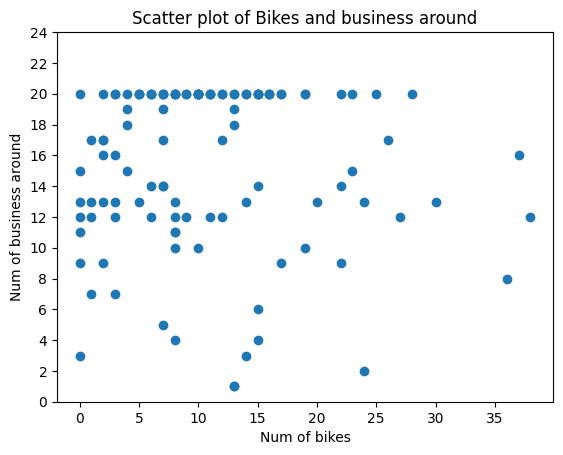

In [84]:
plt.scatter(wdf.num_bikes_mean,wdf.num_bikes_count)

plt.xlabel('Num of bikes')
plt.ylabel('Num of business around')

plt.ylim(0,24)
plt.yticks([2*i for i in range(13)])
plt.title('Scatter plot of Bikes and business around')

Text(0.5, 1.0, 'Number of bikes and Weighted average of the sorrounding Businesses')

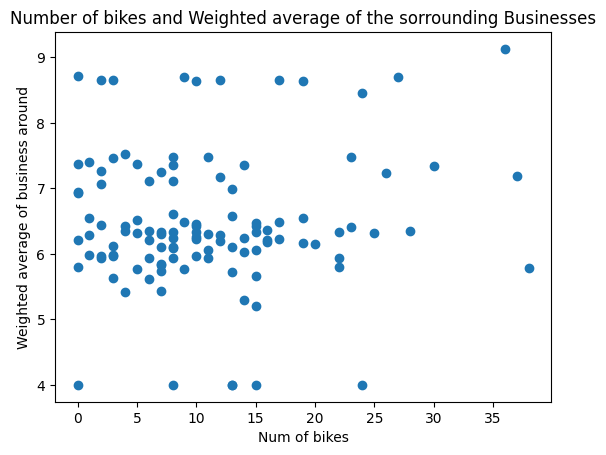

In [87]:
plt.scatter(wdf.num_bikes_mean,wdf.WA)
plt.xlabel('Num of bikes')
plt.ylabel('Weighted average of business around')

plt.title('Number of bikes and Weighted average of the sorrounding Businesses')

Text(0.5, 1.0, 'Number of bikes and thet total number of  reviews')

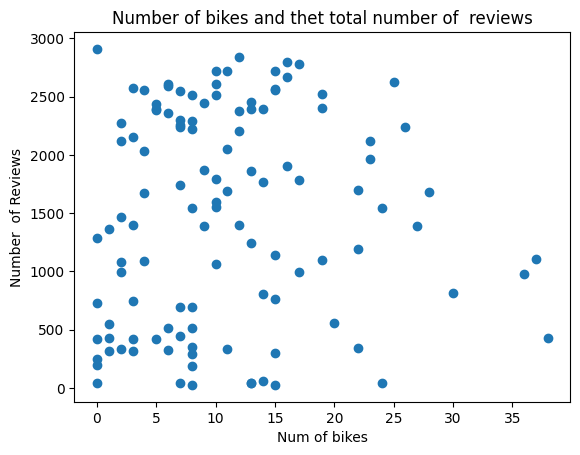

In [88]:
plt.scatter(wdf.num_bikes_mean,wdf.rating_counts_sum)


plt.xlabel('Num of bikes')
plt.ylabel('Number  of Reviews')

plt.title('Number of bikes and thet total number of  reviews')


Text(0.5, 1.0, 'Relationship Between  Number of bikes and Mean distances from business')

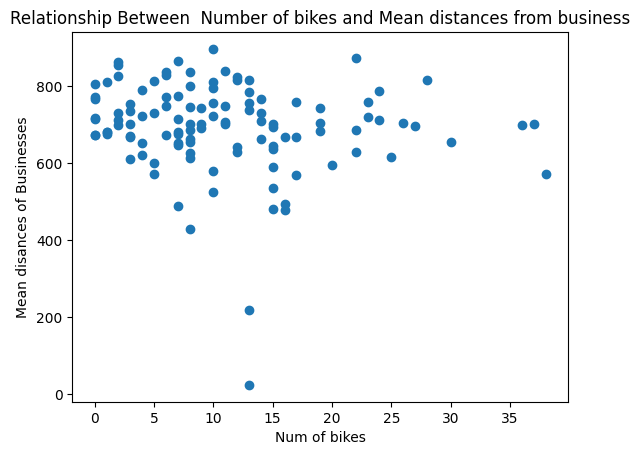

In [89]:
plt.scatter(wdf.num_bikes_mean, wdf.distance_mean)




plt.xlabel('Num of bikes')
plt.ylabel('Mean disances of Businesses')

plt.title('Relationship Between  Number of bikes and Mean distances from business')


In [ ]:
bikes.head()

,name,latitude,longitude,num_bikes
0,GEORGES LANE,53.350230,-6.279696,18
1,NORTH CIRCULAR ROAD (O'CONNELL'S),53.357841,-6.251557,24
2,PHIBSBOROUGH ROAD,53.356307,-6.273717,13
3,SMITHFIELD NORTH,53.349562,-6.278198,26
4,CLONMEL STREET,53.336021,-6.262980,7


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [74]:
conn = sqlite3.connect('scrape.db')
c = conn.cursor()

In [75]:


# create table in SQLite database
c.execute('''CREATE TABLE IF NOT EXISTS free_bikes
             (ID INT PRIMARY KEY NOT NULL,
             Name TEXT NOT NULL,
             latitude REAL NOT NULL,
             longitude REAL NOT NULL,
             num_bikes INT NOT NULL);''')

# insert data from joined dataframe into SQLite database
for index, row in bikes.iterrows():
    c.execute("INSERT INTO free_bikes (ID, Name, latitude, longitude, num_bikes) VALUES (?, ?, ?, ?, ?)", ( index, row['name'], row['latitude'], row['longitude'], row['num_bikes']))

# commit changes and close connection
conn.commit()


In [76]:
df.head(2)

,station_name,name,rating,Address,rating_counts,distance
0,GEORGES LANE,Urbanity,4.5,The Glass House 11 Coke Lane Smithfield Dublin...,49.0,381.330910
1,GEORGES LANE,Queen of Tarts,4.5,Cork Hill Dame Street Dublin 2 Republic of Ire...,516.0,1055.350508


In [77]:

c.execute('DROP TABLE IF EXISTS environs')
# create table in SQLite database
c.execute('''CREATE TABLE IF NOT EXISTS environs
             (ID INT PRIMARY KEY NOT NULL,
             Station_name TEXT NOT NULL,
             name TEXT NOT NULL,
             rating REAL ,
             Address TEXT,
             Distance REAL,
             rating_count INT );''')
i =0
# insert data from joined dataframe into SQLite database
for index, row in df.iterrows():
    c.execute("INSERT INTO environs (ID, Station_name, name, rating, Address,Distance, rating_count) VALUES (?, ?, ?, ?, ?, ?,?)", ( i, row['station_name'], row['name'], row['rating'], row['Address'], row['distance'] ,row['rating_counts']))
    i += 1
# commit changes and close connection
conn.commit()


In [78]:
conn.close()

In [80]:
df.sample(7)

,station_name,name,rating,Address,rating_counts,distance
705,PARNELL SQUARE NORTH,Hanley's Cornish Pasties,4.5,2 Merchants Arch Temple Bar Dublin 2 Republic ...,55.0,901.052822
176,DEVERELL PLACE,KC Peaches Cafe Nassau Street,3.5,28-29 Nassau St Dublin 2 Republic of Ireland,76.0,991.415124
236,WILTON TERRACE (PARK),Coffeeangel,7.7,"27 Pembroke Street Lower, Dublin, Dublin City",64.0,430.000000
999,FOWNES STREET UPPER,The Quays Irish Restaurant,8.0,"10-12 Temple Bar Square, Dublin, Dublin City",293.0,106.000000
725,SMITHFIELD,Busy Feet & Coco Cafe,4.0,41-42 South William Street Dublin 2 Republic o...,49.0,1215.753322
905,GRANGEGORMAN LOWER (SOUTH),The Coffee Bean,8.1,"64 Mary St, Dublin, Dublin City",14.0,961.000000
608,ST. STEPHEN'S GREEN SOUTH,Coffeeangel,7.7,"27 Pembroke Street Lower, Dublin, Dublin City",64.0,662.000000


Look at the data before and after the join to validate your data.

In [79]:
wdf.to_csv('grouped.csv')